# Goal
##### The goal is to analyze inflation trends using CPI data in the form of an index based on 1982-1984=100. This will help understand how inflation has evolved over time for urban consumers, comparing the overall Consumer Price Index (CPI) with the core CPI (less food and energy).

# Data Dictionary: 
CPI_All_Items: Consumer Price Index for All Urban Consumers.
CPI_Less_Food_Energy: Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Loading Data

In [20]:
import os
from dotenv import load_dotenv
load_dotenv()

path = os.getenv('DATA_PATH')
df = pd.read_csv(path)

# 1. Data Understanding and Preperation
 * What is the structure and time range of the data?
  * Are there any missing values?

In [21]:
# Renaming column
df = df.rename(columns={'Unnamed: 0': 'Date'})

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 812 entries, 1957-01-01 to 2024-08-01
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CPI_All_Items         812 non-null    float64
 1   CPI_Less_Food_Energy  812 non-null    float64
dtypes: float64(2)
memory usage: 19.0 KB


<Axes: xlabel='Date'>

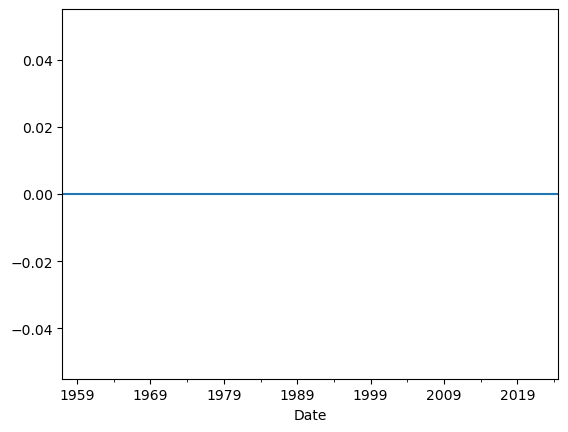

In [24]:
df.isnull().sum(axis=1).plot()

##### No missing values

In [25]:
# Time range
min_index = df.index.min()
max_index = df.index.max()

print(f"The Time Range of the data is : {min_index} - {max_index}")

The Time Range of the data is : 1957-01-01 00:00:00 - 2024-08-01 00:00:00


# 2.Exploratory Data Analysis (EDA)

In [26]:
df.describe()

,CPI_All_Items,CPI_Less_Food_Energy
count,812.000000,812.000000
mean,134.760110,138.439057
std,83.765672,85.567787
min,27.670000,28.500000
25%,46.200000,46.650000
50%,133.550000,137.800000
75%,208.707750,211.684750
max,314.121000,319.768000


In [27]:
px.line(df)

In [28]:
df_melt = pd.melt(df, value_vars = ['CPI_All_Items', 'CPI_Less_Food_Energy'], value_name = 'cpi', ignore_index = False)
df_melt

,variable,cpi
Date,,
1957-01-01,CPI_All_Items,27.670
1957-02-01,CPI_All_Items,27.800
1957-03-01,CPI_All_Items,27.860
1957-04-01,CPI_All_Items,27.930
1957-05-01,CPI_All_Items,28.000
...,...,...
2024-04-01,CPI_Less_Food_Energy,317.622
2024-05-01,CPI_Less_Food_Energy,318.140
2024-06-01,CPI_Less_Food_Energy,318.346


In [30]:
df_melt['Date'] = df_melt.index

In [31]:
df_wide = pd.pivot(df_melt, index = 'variable', columns = 'Date', values= 'cpi')

In [32]:
df_wide

Date,1957-01-01,1957-02-01,1957-03-01,1957-04-01,1957-05-01,1957-06-01,1957-07-01,1957-08-01,1957-09-01,1957-10-01,...,2023-11-01,2023-12-01,2024-01-01,2024-02-01,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01
variable,,,,,,,,,,,,,,,,,,,,,
CPI_All_Items,27.67,27.8,27.86,27.93,28.0,28.11,28.19,28.28,28.32,28.32,...,308.024,308.742,309.685,311.054,312.230,313.207,313.225,313.049,313.534,314.121
CPI_Less_Food_Energy,28.50,28.6,28.70,28.80,28.8,28.90,29.00,29.00,29.10,29.20,...,312.349,313.209,314.438,315.565,316.698,317.622,318.140,318.346,318.872,319.768


# Calculating Inflation Rate 

In [33]:
annual_cpi = df.resample('Y').first()
annual_cpi['Inflation_Rate_All_Item']= annual_cpi['CPI_All_Items'].pct_change() * 100
annual_cpi['Inflation_Rate_Less_Food_Enrgery'] = annual_cpi['CPI_Less_Food_Energy']\
           .pct_change() * 100
annual_cpi.dropna(inplace=True)

C:\Users\SOULS\AppData\Local\Temp\ipykernel_8320\1221302398.py:1: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



In [57]:
annual_cpi

,CPI_All_Items,CPI_Less_Food_Energy,Inflation_Rate_All_Item,Inflation_Rate_Less_Food_Enrgery
Date,,,,
1958-12-31,28.640,29.300,3.505602,2.807018
1959-12-31,29.010,29.900,1.291899,2.047782
1960-12-31,29.370,30.500,1.240951,2.006689
1961-12-31,29.840,30.800,1.600272,0.983607
1962-12-31,30.040,31.200,0.670241,1.298701
...,...,...,...,...
2020-12-31,258.906,266.698,2.512264,2.274836
2021-12-31,262.518,270.422,1.395101,1.396336
2022-12-31,282.390,286.811,7.569767,6.060528


In [37]:
# Filter the dataset from the year 2000 to the latest available date
annual_cpi = annual_cpi.loc['2000':]

In [65]:
px.line(annual_cpi)

# Track Inflation Trends Over Time:

### * Analyze trends in the Consumer Price Index (CPI) over the years, focusing on both CPI_All_Items and CPI_Less_Food_Energy.
### * Provide a summary of inflation trends for different time periods, highlighting notable spikes or declines

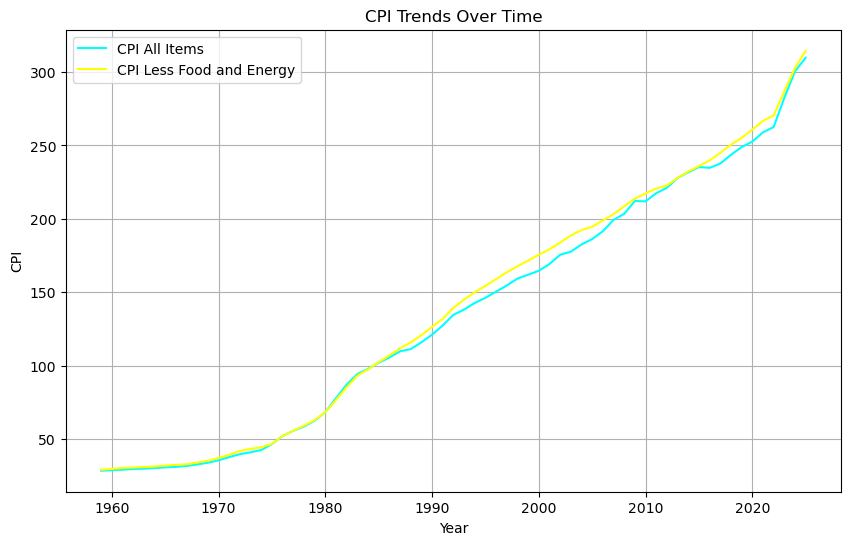

In [34]:
plt.figure(figsize=(10,6))
plt.plot(annual_cpi.index, annual_cpi['CPI_All_Items'], label='CPI All Items', color='cyan')
plt.plot(annual_cpi.index, annual_cpi['CPI_Less_Food_Energy'], label='CPI Less Food and Energy', color='yellow')
plt.title('CPI Trends Over Time')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.legend()
plt.grid(True)
plt.show()

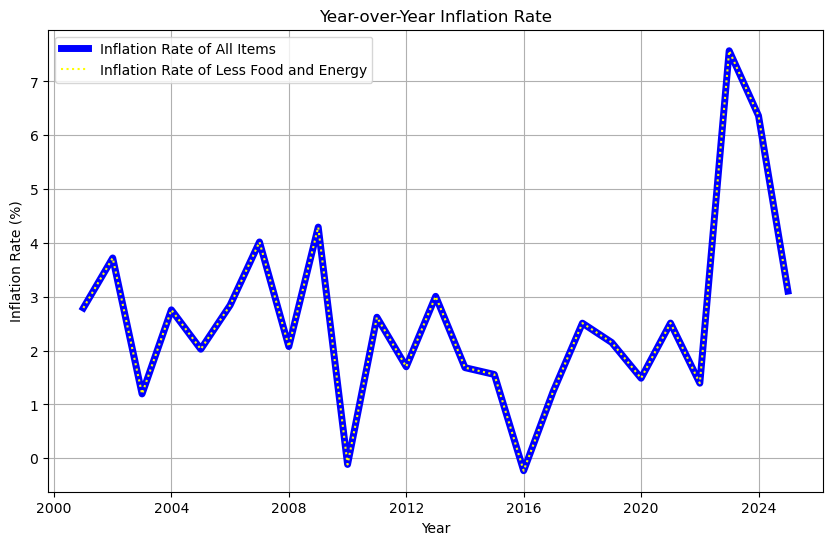

In [93]:
plt.figure(figsize=(10,6))
plt.plot(annual_cpi.index, annual_cpi['Inflation_Rate_All_Item'], label='Inflation Rate of All Items', color='blue', linewidth=5)
plt.plot(annual_cpi.index, annual_cpi['Inflation_Rate_All_Item'], label='Inflation Rate of Less Food and Energy', color='yellow', linestyle=':')
plt.title('Year-over-Year Inflation Rate')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

#### There are some significant change in the inflation rate. The most concernd change is after 2008. The inflation rate dropped very low. 

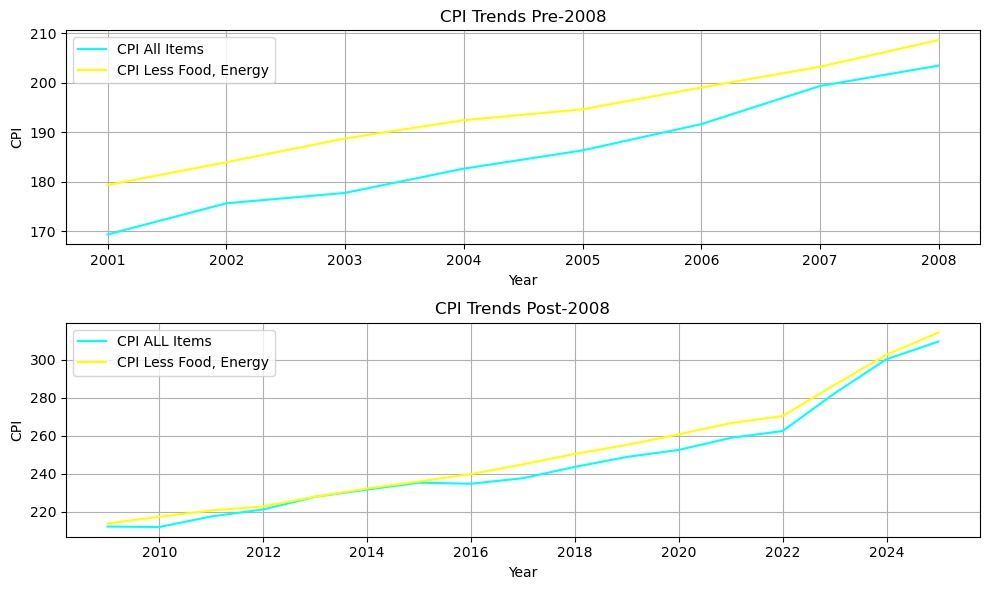

In [42]:
pre_2008 = annual_cpi[annual_cpi.index < '2008-01-01']
post_2008 = annual_cpi[annual_cpi.index >= '2008-01-01']

fig, ax = plt.subplots(2, 1, figsize=(10,6))

ax[0].plot(pre_2008.index, pre_2008['CPI_All_Items'], label='CPI All Items', color='cyan')
ax[0].plot(pre_2008.index, pre_2008['CPI_Less_Food_Energy'], label='CPI Less Food, Energy', color='yellow')
ax[0].set_title('CPI Trends Pre-2008')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('CPI')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(post_2008.index, post_2008['CPI_All_Items'], label='CPI ALL Items', color='cyan')
ax[1].plot(post_2008.index, post_2008['CPI_Less_Food_Energy'], label='CPI Less Food, Energy',color='yellow')
ax[1].set_title('CPI Trends Post-2008')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('CPI')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [40]:
data_2007_2024 = annual_cpi[(annual_cpi.index >= '2005-01-01') & (annual_cpi.index < '2023-01-01')]

px.line(data_2007_2024)

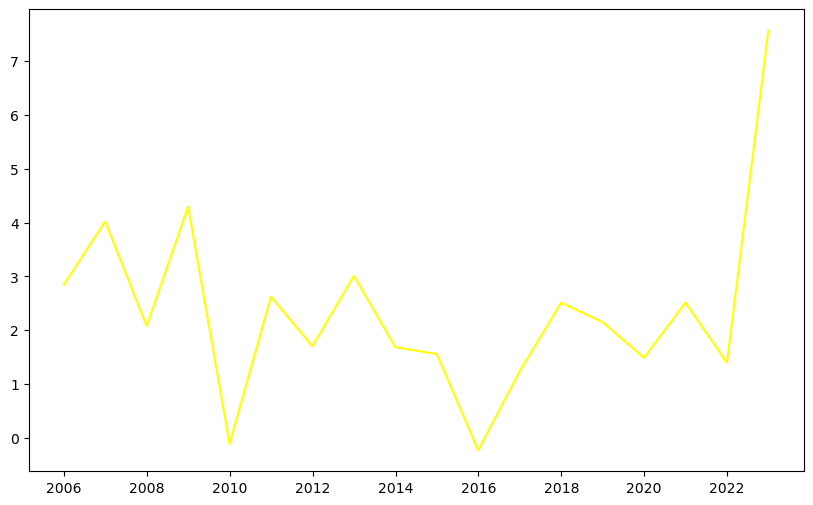

In [41]:
plt.figure(figsize=(10,6))
# plt.plot(data_2007_2024.index, data_2007_2024['CPI_All_Items'], label='CPI', color='cyan')
plt.plot(data_2007_2024.index, data_2007_2024['Inflation_Rate_All_Item'], label='Inflation', color='yellow')
plt.show()

#### The sharp drop in inflation from 4.29% in December 2008 to -0.11% in December 2009 reflects the economic fallout from the 2008 financial crisis. 